In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [46]:
X = df.iloc[:,3:].values

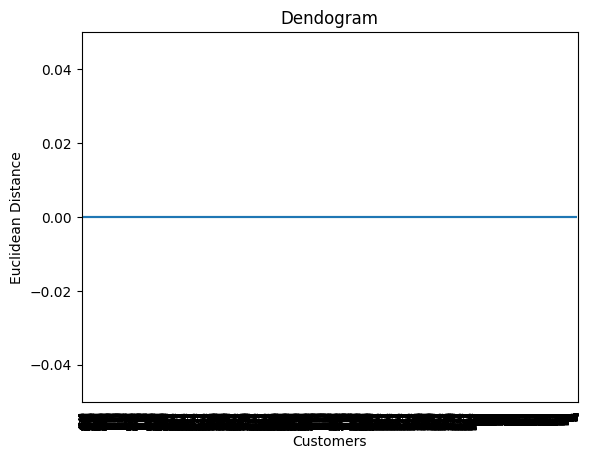

In [48]:
import warnings
warnings.filterwarnings('ignore')
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))

plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

In [12]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

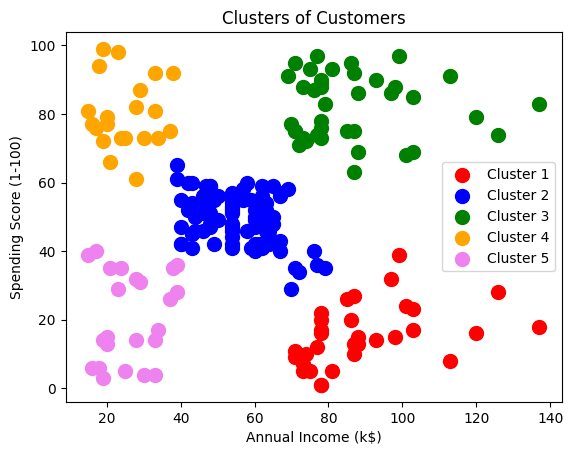

In [17]:
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], s=100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], s=100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], s=100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc==3,0], X[y_hc==3,1], s=100, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_hc==4,0], X[y_hc==4,1], s=100, c= 'violet' , label = 'Cluster 5')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [18]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,y_hc)
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.553


**Task: Sentiment analysis for Financial News**


In [19]:
uploaded = files.upload()

Saving all-data.csv to all-data.csv


In [26]:
df = pd.read_csv("all-data.csv",encoding = 'latin1', header=None)


In [27]:
df.head()


,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [28]:
df.columns = ['label', 'text']
df.head()

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [31]:

X = df['text']
y = df['label']

tfidf = TfidfVectorizer(
    max_features=1000,
    stop_words='english'
)




In [32]:

X_tfidf = tfidf.fit_transform(df['text']).toarray()


In [33]:
X_subset = X_tfidf[:100]


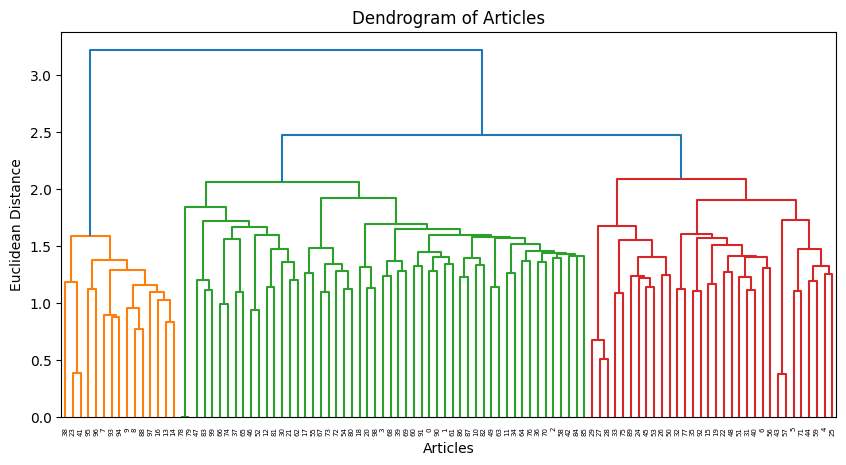

In [44]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(
    sch.linkage(X_subset, method='ward')
)

plt.title("Dendrogram of Articles")
plt.xlabel("Articles")
plt.ylabel("Euclidean Distance")
plt.show()


In [35]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(
    n_clusters=3,
    metric='euclidean',
    linkage='ward'
)

labels = hc.fit_predict(X_tfidf)


In [36]:
df['cluster'] = labels


In [37]:
df['cluster'].value_counts()



,count
cluster,
0,4539
1,248
2,59


In [38]:
for i in range(3):
    print(f"\nCluster {i}")
    print(df[df['cluster'] == i]['text'].head(3))



Cluster 0
0    According to Gran , the company has no plans t...
1    Technopolis plans to develop in stages an area...
2    The international electronic industry company ...
Name: text, dtype: object

Cluster 1
6    For the last quarter of 2010 , Componenta 's n...
7    In the third quarter of 2010 , net sales incre...
8    Operating profit rose to EUR 13.1 mn from EUR ...
Name: text, dtype: object

Cluster 2
49     The company 's order book stood at 1.5 bln eur...
63     At first the contract envisaged the constructi...
193    Finnish department store chain Stockmann Oyj A...
Name: text, dtype: object


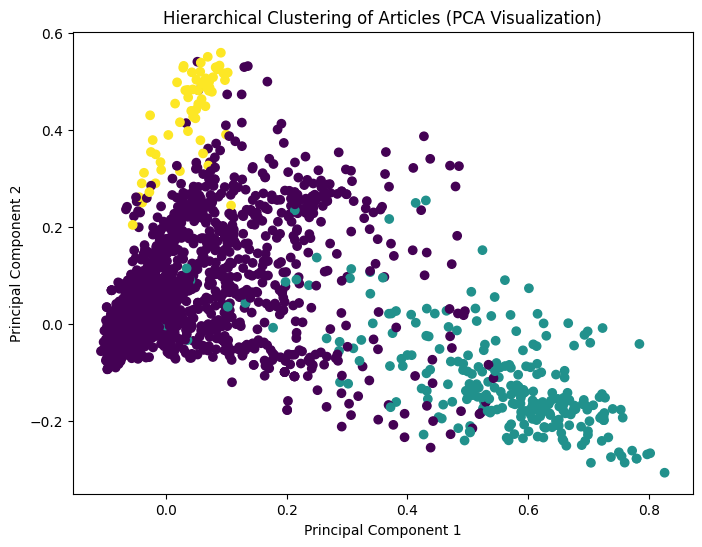

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf)


import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title("Hierarchical Clustering of Articles (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [41]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_tfidf, labels)

print("Silhouette Score:", score)


Silhouette Score: 0.008149231883881409
